In [ ]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import librosa
import numpy as np

# Function to extract audio features for weather detection
def audio_feature_extraction(audio_filename, hop_duration, num_mfcc, num_frames):
    try:
        # Load audio data from file
        samples, sampling_rate = librosa.load(audio_filename, sr=44100)
        
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(
            y=samples, 
            sr=sampling_rate, 
            hop_length=int(sampling_rate * hop_duration), 
            n_mfcc=num_mfcc
        )
        
        # Extract Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=samples, sr=sampling_rate)
        
        # Ensure that both sets of features have the same number of frames
        min_frames = min(mfcc.shape[1], spectral_centroid.shape[1], num_frames)
        mfcc = mfcc[:, :min_frames]
        spectral_centroid = spectral_centroid[:, :min_frames]
        
        # Pad or trim the features to have a fixed number of frames
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, num_frames - min_frames)), mode='constant')
        spectral_centroid_padded = np.pad(spectral_centroid, ((0, 0), (0, num_frames - min_frames)), mode='constant')
        
        # Combine MFCC and Spectral Centroid features
        features = np.concatenate((mfcc_padded, spectral_centroid_padded), axis=0)
        
        # Flatten the features to a 1D array
        return features.flatten()
    except IndexError as e:
        print(f"Error occurred while processing file: {audio_filename}. Error: {str(e)}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing file: {audio_filename}. Error: {str(e)}")
        return None


In [ ]:
# Function to collect audio file paths from a given directory
def collect_audio_files(directory):
    audio_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Parameters for feature extraction and model training
hop_duration = 0.015  # Hop length in seconds
num_mfcc = 16         # Number of MFCC features per frame
num_frames = 200      # Number of frames

# List of weather conditions
weather_conditions = ['Windy', 'Thunder', 'Rain']

# Path to directory containing weather audio data
path = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\Project Echo\Weather Work\Weather Audio'

# Collect file names and labels for training, validation, and testing sets
training_file_names = []
training_weather_labels = []
validation_file_names = []
validation_weather_labels = []
test_file_names = []
test_weather_labels = []


In [ ]:
try:
    for weather_condition in weather_conditions:
        train_path = os.path.join(path, 'Train', weather_condition)
        validate_path = os.path.join(path, 'Validate', weather_condition)
        test_path = os.path.join(path, 'Test', weather_condition)
        
        # Training data
        training_file_names += collect_audio_files(train_path)
        training_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(train_path))
        
        # Validation data
        validation_file_names += collect_audio_files(validate_path)
        validation_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(validate_path))
        
        # Testing data
        test_file_names += collect_audio_files(test_path)
        test_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(test_path))

except Exception as e:
    print("An error occurred while collecting file names and labels:", str(e))


In [ ]:
print(training_file_names)
print(training_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_0.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_1.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_10.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_11.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_12.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Train\\Windy\\filtered_audio_13

In [ ]:
print(validation_file_names)
print(validation_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Windy\\filtered_audio_68.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Windy\\filtered_audio_69.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Windy\\filtered_audio_70.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Windy\\filtered_audio_71.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Windy\\filtered_audio_72.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Validate\\Wind

In [ ]:
print(test_file_names)
print(test_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_100.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_101.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_102.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_103.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_104.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\Project Echo\\Weather Work\\Weather Audio\\Test\\Windy\\filtered_audio_1

In [ ]:
# Extract audio features for training data
training_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in training_file_names]



In [ ]:
# Print the shape of training_features
print("Shape of training_features:", np.array(training_features).shape)

# Print the first few elements of training_features
print("First few elements of training_features:", training_features[:5])


Shape of training_features: (2688, 3400)
First few elements of training_features: [array([-512.55078125, -478.5118103 , -462.21279907, ...,   79.52144842,
         82.63370035,   77.69358291]), array([-560.11102295, -516.45336914, -491.33807373, ...,  411.46139654,
        399.774408  ,  412.79482864]), array([-448.31890869, -380.29684448, -343.74401855, ...,  589.12000447,
        605.68354885,  586.93495586]), array([-448.31890869, -380.29684448, -343.74401855, ...,  589.12000447,
        605.68354885,  586.93495586]), array([-531.4118042 , -513.46618652, -497.8555603 , ...,  641.75743315,
        615.68389777,  566.28090996])]


In [ ]:
# Extract audio features for validation data
validation_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in validation_file_names]



In [ ]:
# Print the shape of training_features
print("Shape of validation_features:", np.array(validation_features).shape)

# Print the first few elements of training_features
print("First few elements of validation_features:", validation_features[:5])

Shape of validation_features: (894, 3400)
First few elements of validation_features: [array([-648.27740479, -648.27740479, -648.19378662, ...,  585.53006419,
        557.65731221,  569.81323745]), array([-559.30218506, -549.62982178, -543.77954102, ...,  152.70864737,
        119.38019887,  111.41740284]), array([-647.7276001 , -647.7276001 , -647.6807251 , ...,  835.23173564,
        864.41954013,  807.05537073]), array([-602.02392578, -602.02392578, -602.02392578, ...,  312.93687067,
        312.41847342,  316.80849627]), array([-572.07580566, -572.07580566, -572.07580566, ...,  418.69205276,
        408.9847061 ,  400.7066435 ])]


In [ ]:
# Extract audio features for testing data
test_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in test_file_names]



In [ ]:
# Print the shape of training_features
print("Shape of test_features:", np.array(test_features).shape)

# Print the first few elements of training_features
print("First few elements of test_features:", test_features[:5])

Shape of test_features: (898, 3400)
First few elements of test_features: [array([-590.72174072, -590.72174072, -590.72174072, ...,  178.12525278,
        176.25056789,  171.53834409]), array([-705.3168335 , -653.72570801, -621.40966797, ...,  871.38882038,
        940.55820607,  851.06906773]), array([-561.35290527, -512.79174805, -482.43179321, ...,  616.45954669,
        641.03653258,  583.10348814]), array([-660.13299561, -604.62969971, -576.82763672, ...,  764.57724684,
        772.55733611,  865.76693453]), array([-634.46691895, -576.72015381, -548.4019165 , ...,  764.57763998,
        772.55769321,  865.76687092])]


In [ ]:
# Train a machine learning model (e.g., SVM)
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
model.fit(training_features, training_weather_labels)



SVC(kernel='linear')

In [ ]:
# Test the model on validation data
predicted_validation_labels = model.predict(validation_features)




In [ ]:
# Calculate accuracy on validation set
validation_accuracy = np.sum(predicted_validation_labels == validation_weather_labels) / len(validation_weather_labels)
print('Validation Accuracy:', validation_accuracy)



Validation Accuracy: 0.9955257270693513


In [ ]:
# Test the model on testing data
predicted_test_labels = model.predict(test_features)



In [ ]:
# Calculate accuracy on testing set
test_accuracy = np.sum(predicted_test_labels == test_weather_labels) / len(test_weather_labels)
print('Testing Accuracy:', test_accuracy)


Testing Accuracy: 0.9988864142538976


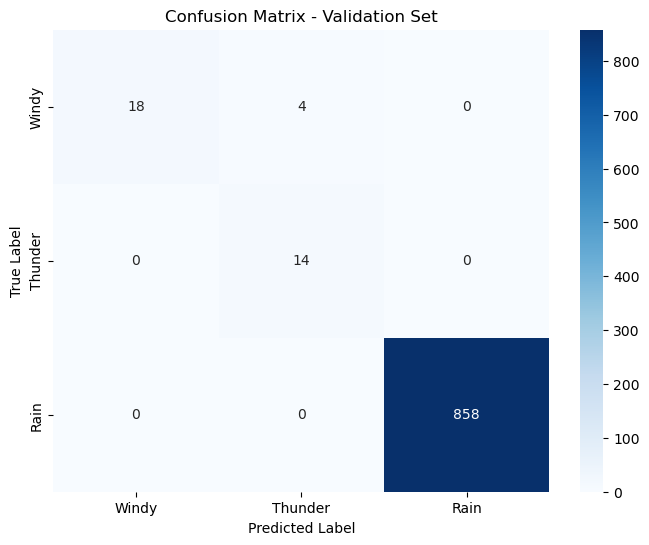

In [ ]:
# Plot confusion matrix for validation set
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_validation = confusion_matrix(validation_weather_labels, predicted_validation_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt='d', cmap='Blues', xticklabels=weather_conditions, yticklabels=weather_conditions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()


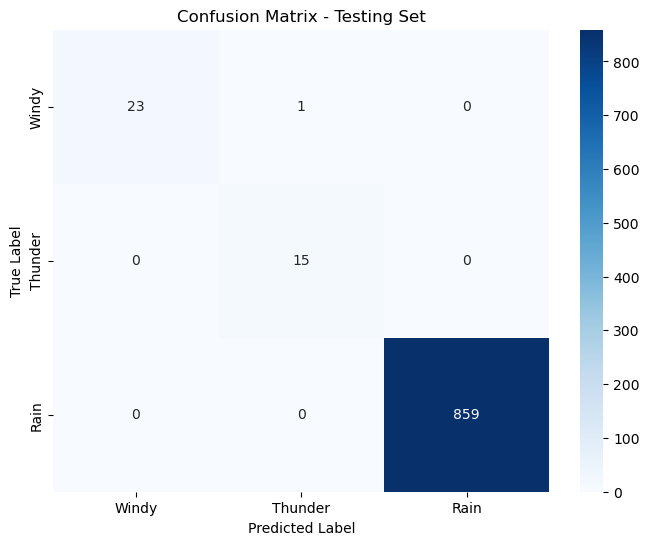

In [ ]:
# Plot confusion matrix for validation set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for testing set
conf_matrix_test = confusion_matrix(test_weather_labels, predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=weather_conditions, yticklabels=weather_conditions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Testing Set')
plt.show()